In [46]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions #to plot decision boundary

In [47]:
df=pd.DataFrame()

In [48]:
df['X1']=[1,2,3,4,5,6,6,7,9,9]
df['X2']=[5,3,6,8,1,9,5,8,9,2]
df['label']=[1,1,0,1,0,1,0,1,0,0]

In [49]:
df

,X1,X2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


<Axes: xlabel='X1', ylabel='X2'>

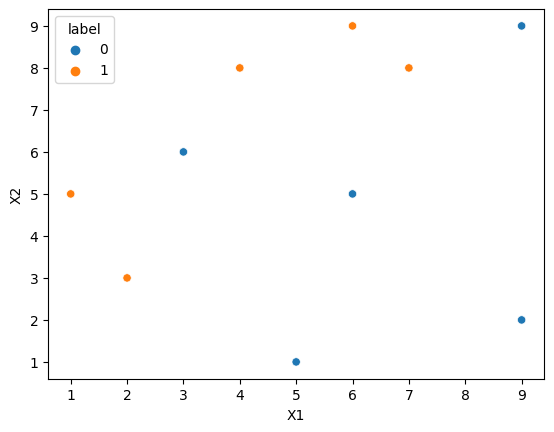

In [50]:
import seaborn as sns
sns.scatterplot(x=df['X1'],y=df['X2'],hue=df['label'])

In [51]:
# assign initial weights 1 divide by total row
df['weight']=1/df.shape[0]

In [52]:
df

,X1,X2,label,weight
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
dt1=DecisionTreeClassifier(max_depth=1)

In [55]:
x=df.iloc[:,0:2].values
y=df.iloc[:,2].values

In [56]:
#step 2-train 1st model
dt1.fit(x,y)


DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]')]

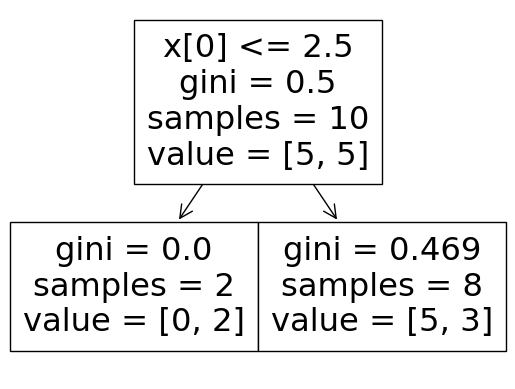

In [57]:
from sklearn.tree import plot_tree
plot_tree(dt1)

<Axes: >

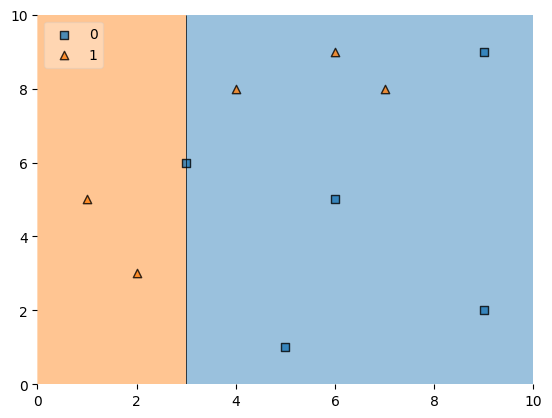

In [58]:
plot_decision_regions(x,y,clf=dt1,legend=2)

In [59]:
#make prediction on 1st decision stums
df['y_pred']=dt1.predict(x)


In [60]:
df

,X1,X2,label,weight,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


In [61]:
#error is sum of weight of misclassified row
def calculate_model_weight(error):
    return 0.5*np.log((1-error)/(error))

In [62]:
# step 3 calculate model weight
alpha1=calculate_model_weight(0.3)
alpha1

0.42364893019360184

In [63]:
#step 4 Update weights
def update_row_weight(row,alpha=0.423):
    if row['label']==row['y_pred']:
        return row['weight']*np.exp(-alpha)
    else:
        return row['weight']*np.exp(alpha)
        
    

In [64]:
df['updated_weights'] = df.apply(update_row_weight,axis=1)
df

,X1,X2,label,weight,y_pred,updated_weights
0,1,5,1,0.1,1,0.065508
1,2,3,1,0.1,1,0.065508
2,3,6,0,0.1,0,0.065508
3,4,8,1,0.1,0,0.152653
4,5,1,0,0.1,0,0.065508
5,6,9,1,0.1,0,0.152653
6,6,5,0,0.1,0,0.065508
7,7,8,1,0.1,0,0.152653
8,9,9,0,0.1,0,0.065508
9,9,2,0,0.1,0,0.065508


In [65]:
df['updated_weights'].sum()

0.9165153319682015

In [66]:
df['nomalized_weights'] = df['updated_weights']/df['updated_weights'].sum()  
df
     

,X1,X2,label,weight,y_pred,updated_weights,nomalized_weights
0,1,5,1,0.1,1,0.065508,0.071475
1,2,3,1,0.1,1,0.065508,0.071475
2,3,6,0,0.1,0,0.065508,0.071475
3,4,8,1,0.1,0,0.152653,0.166559
4,5,1,0,0.1,0,0.065508,0.071475
5,6,9,1,0.1,0,0.152653,0.166559
6,6,5,0,0.1,0,0.065508,0.071475
7,7,8,1,0.1,0,0.152653,0.166559
8,9,9,0,0.1,0,0.065508,0.071475
9,9,2,0,0.1,0,0.065508,0.071475


In [67]:
df['nomalized_weights'].sum()

1.0

In [68]:
df['cumsum_upper'] = np.cumsum(df['nomalized_weights'])
     

df['cumsum_lower'] = df['cumsum_upper'] - df['nomalized_weights']
     

df[['X1','X2','label','weight','y_pred','updated_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weight,y_pred,updated_weights,cumsum_lower,cumsum_upper
0,1,5,1,0.1,1,0.065508,0.000000,0.071475
1,2,3,1,0.1,1,0.065508,0.071475,0.142950
2,3,6,0,0.1,0,0.065508,0.142950,0.214425
3,4,8,1,0.1,0,0.152653,0.214425,0.380983
4,5,1,0,0.1,0,0.065508,0.380983,0.452458
5,6,9,1,0.1,0,0.152653,0.452458,0.619017
6,6,5,0,0.1,0,0.065508,0.619017,0.690492
7,7,8,1,0.1,0,0.152653,0.690492,0.857050
8,9,9,0,0.1,0,0.065508,0.857050,0.928525
9,9,2,0,0.1,0,0.065508,0.928525,1.000000


In [69]:
#we selct random number betweem 0 and 1 and check that this number 
#reside in which rage and select that row and return indexes
def create_new_dataset(df):

  indices = []

  for i in range(df.shape[0]):
    a = np.random.random()
    for index,row in df.iterrows():
      if row['cumsum_upper'] > a and a > row['cumsum_lower']:
        indices.append(index)
  return indices

In [70]:
index_values= create_new_dataset(df)

In [71]:
index_values
#upsampling is done

[1, 3, 2, 8, 5, 3, 8, 5, 5, 7]

In [72]:
# create new dataframe with above row and 0,1,2,3 columns
second_df=df.iloc[index_values,[0,1,2,3]] 

In [73]:
second_df

,X1,X2,label,weight
1,2,3,1,0.1
3,4,8,1,0.1
2,3,6,0,0.1
8,9,9,0,0.1
5,6,9,1,0.1
3,4,8,1,0.1
8,9,9,0,0.1
5,6,9,1,0.1
5,6,9,1,0.1
7,7,8,1,0.1


In [74]:
dt2 = DecisionTreeClassifier(max_depth=1)
     

X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values
     

dt2.fit(X,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 8.0\ngini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(0.25, 0.25, 'gini = 0.219\nsamples = 8\nvalue = [1, 7]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]')]

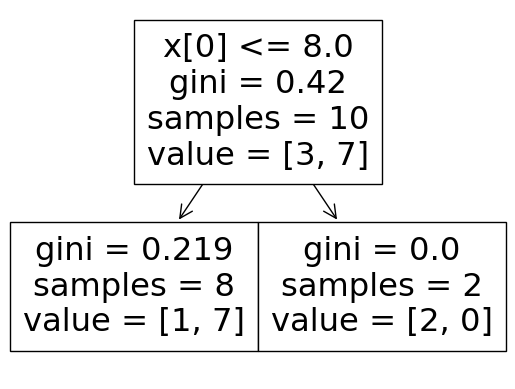

In [76]:
plot_tree(dt2)

<Axes: >

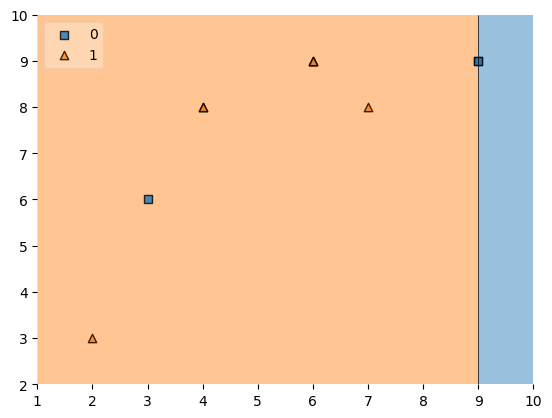

In [77]:
plot_decision_regions(X, y, clf=dt2, legend=2)

In [78]:
second_df['y_pred'] = dt2.predict(X)  
second_df

,X1,X2,label,weight,y_pred
1,2,3,1,0.1,1
3,4,8,1,0.1,1
2,3,6,0,0.1,1
8,9,9,0,0.1,0
5,6,9,1,0.1,1
3,4,8,1,0.1,1
8,9,9,0,0.1,0
5,6,9,1,0.1,1
5,6,9,1,0.1,1
7,7,8,1,0.1,1


In [80]:
alpha2 = calculate_model_weight(0.1)
alpha2

1.0986122886681098

In [84]:
# Step 4 - Update weights
def update_row_weights(row,alpha=1.09):
  if row['label'] == row['y_pred']:
    return row['weight'] * np.exp(-alpha)
  else:
    return row['weight'] * np.exp(alpha)

In [85]:
second_df['updated_weight'] = second_df.apply(update_row_weights,axis=1)

In [86]:
second_df

,X1,X2,label,weight,y_pred,updated_weight
1,2,3,1,0.1,1,0.033622
3,4,8,1,0.1,1,0.033622
2,3,6,0,0.1,1,0.297427
8,9,9,0,0.1,0,0.033622
5,6,9,1,0.1,1,0.033622
3,4,8,1,0.1,1,0.033622
8,9,9,0,0.1,0,0.033622
5,6,9,1,0.1,1,0.033622
5,6,9,1,0.1,1,0.033622
7,7,8,1,0.1,1,0.033622


In [88]:
second_df['nomalized_weights'] = second_df['updated_weight']/second_df['updated_weight'].sum()

In [89]:
second_df

,X1,X2,label,weight,y_pred,updated_weight,nomalized_weights
1,2,3,1,0.1,1,0.033622,0.056034
3,4,8,1,0.1,1,0.033622,0.056034
2,3,6,0,0.1,1,0.297427,0.495694
8,9,9,0,0.1,0,0.033622,0.056034
5,6,9,1,0.1,1,0.033622,0.056034
3,4,8,1,0.1,1,0.033622,0.056034
8,9,9,0,0.1,0,0.033622,0.056034
5,6,9,1,0.1,1,0.033622,0.056034
5,6,9,1,0.1,1,0.033622,0.056034
7,7,8,1,0.1,1,0.033622,0.056034


In [90]:
second_df['nomalized_weights'].sum()

0.9999999999999999

In [92]:
second_df['cumsum_upper'] = np.cumsum(second_df['nomalized_weights'])
     

second_df['cumsum_lower'] = second_df['cumsum_upper'] - second_df['nomalized_weights']
     

second_df[['X1','X2','label','weight','y_pred','nomalized_weights','cumsum_lower','cumsum_upper']]

,X1,X2,label,weight,y_pred,nomalized_weights,cumsum_lower,cumsum_upper
1,2,3,1,0.1,1,0.056034,0.000000,0.056034
3,4,8,1,0.1,1,0.056034,0.056034,0.112068
2,3,6,0,0.1,1,0.495694,0.112068,0.607762
8,9,9,0,0.1,0,0.056034,0.607762,0.663796
5,6,9,1,0.1,1,0.056034,0.663796,0.719830
3,4,8,1,0.1,1,0.056034,0.719830,0.775864
8,9,9,0,0.1,0,0.056034,0.775864,0.831898
5,6,9,1,0.1,1,0.056034,0.831898,0.887932
5,6,9,1,0.1,1,0.056034,0.887932,0.943966
7,7,8,1,0.1,1,0.056034,0.943966,1.000000


In [94]:
index_values = create_new_dataset(second_df)
     

third_df = second_df.iloc[index_values,[0,1,2,3]]
     

third_df

,X1,X2,label,weight
3,4,8,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
8,9,9,0,0.1
5,6,9,1,0.1
2,3,6,0,0.1
8,9,9,0,0.1
8,9,9,0,0.1
5,6,9,1,0.1
5,6,9,1,0.1


In [96]:
dt3 = DecisionTreeClassifier(max_depth=1)

X = second_df.iloc[:,0:2].values
y = second_df.iloc[:,2].values

dt3.fit(X,y)

DecisionTreeClassifier(max_depth=1)

<Axes: >

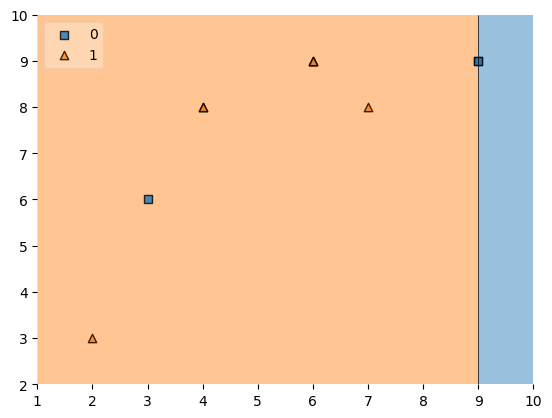

In [97]:
plot_decision_regions(X, y, clf=dt3, legend=2)

In [98]:
third_df['y_pred'] = dt3.predict(X)
third_df

,X1,X2,label,weight,y_pred
3,4,8,1,0.1,1
2,3,6,0,0.1,1
3,4,8,1,0.1,1
8,9,9,0,0.1,0
5,6,9,1,0.1,1
2,3,6,0,0.1,1
8,9,9,0,0.1,0
8,9,9,0,0.1,1
5,6,9,1,0.1,1
5,6,9,1,0.1,1


In [99]:
alpha3 = calculate_model_weight(0.7)
alpha3

-0.4236489301936017

In [100]:
print(alpha1,alpha2,alpha3)

0.42364893019360184 1.0986122886681098 -0.4236489301936017


## prediction

In [101]:
query = np.array([1,5]).reshape(1,2)
dt1.predict(query)

array([1], dtype=int64)

In [102]:
dt2.predict(query)

array([1], dtype=int64)

In [103]:
dt3.predict(query)

array([1], dtype=int64)

In [104]:
alpha1*1 + alpha2*(1) + alpha3*(1)


1.09861228866811

In [105]:
np.sign(1.09)

1.0

In [113]:
query2 = np.array([9,9]).reshape(1,2)
dt1.predict(query2)

array([0], dtype=int64)

In [114]:
dt2.predict(query2)

array([0], dtype=int64)

In [115]:
dt3.predict(query2)

array([0], dtype=int64)

In [117]:
alpha1*(-1) + alpha2*(-1) + alpha3*(-1)

-1.09861228866811

In [118]:
np.sign(-1.09)

-1.0